<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
    Import and Clean the Data
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    Import the dataset and set the date column as the index.
Filter out the top and bottom 2.5% of page views
</div>

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('C:/Users/HP/OneDrive/Documents/PYTHON/PANDAS/DATABASES/pageviews.csv')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [112]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 10 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1238 non-null   object
 1   value   1238 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.0+ KB


<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
    Draw the Line Chart
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
   Define the draw_line_plot function to plot the cleaned data
</div>

In [117]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='r', linewidth=1)
    
    # Titles and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

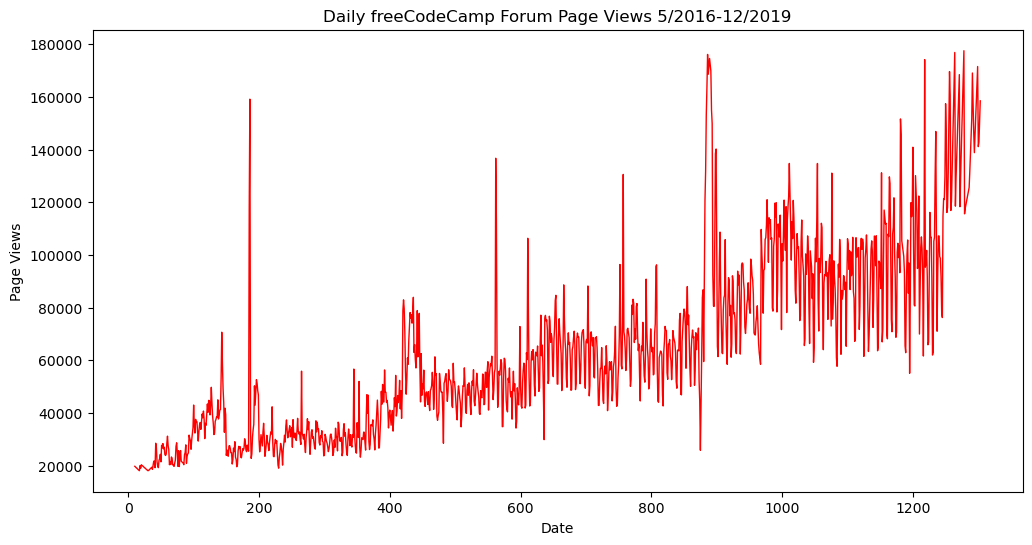

In [119]:
draw_line_plot()

<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
    Draw the Bar Chart
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
   Prepare the data and define draw_bar_plot to show average monthly page views grouped by year.
</div>

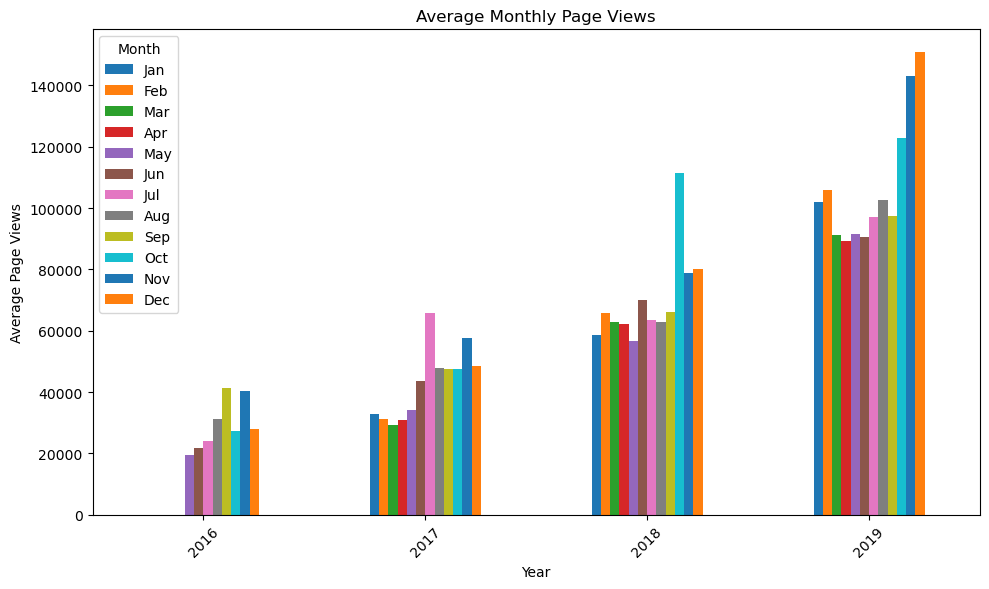

In [181]:
df = pd.read_csv('C:/Users/HP/OneDrive/Documents/PYTHON/PANDAS/DATABASES/pageviews.csv')
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Step 3: Resample data by month and calculate the mean of page views
monthly_df = df.resample('ME').mean()

# Step 4: Add Year and Month columns for grouping
monthly_df['Year'] = monthly_df.index.year
monthly_df['Month'] = monthly_df.index.month

# Step 5: Group by Year and Month and calculate the average page views for each month
average_monthly_views = monthly_df.groupby(['Year', 'Month']).mean().unstack()

# Step 6: Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
average_monthly_views.plot(kind='bar', ax=ax)
plt.title('Average Monthly Page Views')
plt.xlabel('Year')
plt.ylabel('Average Page Views')
plt.legend(title='Month', labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
    Draw the Box Plots
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
   Transform the data for draw_box_plot.
</div>

In [193]:
def draw_box_plot(df):
    
    # Convert 'date' column to datetime if necessary and set as index
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
    
    # Prepare the data for year-wise and month-wise box plots
    df['year'] = df.index.year  
    df['month'] = df.index.strftime('%b')  
    df['month_num'] = df.index.month  
    df = df.sort_values('month_num')  

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle("Box Plots Showing Distribution Trends and Seasonality", fontsize=16)

    # Create the Year-wise Box Plot
    sns.boxplot(
        x='year', y='value', data=df, ax=axes[0],
        palette='coolwarm', hue='year', legend=False
    )
    axes[0].set_title('Year-wise Box Plot (Trend)', fontsize=14)
    axes[0].set_xlabel('Year', fontsize=12)
    axes[0].set_ylabel('Page Views', fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Create the Month-wise Box Plot
    sns.boxplot(
        x='month', y='value', data=df, ax=axes[1],
        palette='viridis', hue='month', legend=False
    )
    axes[1].set_title('Month-wise Box Plot (Seasonality)', fontsize=14)
    axes[1].set_xlabel('Month', fontsize=12)
    axes[1].set_ylabel('Page Views', fontsize=12)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust y-axis limits to better visualize spread
    ymin, ymax = df['value'].min(), df['value'].max()
    axes[0].set_ylim(ymin * 0.9, ymax * 1.1)  
    axes[1].set_ylim(ymin * 0.9, ymax * 1.1)

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.show()


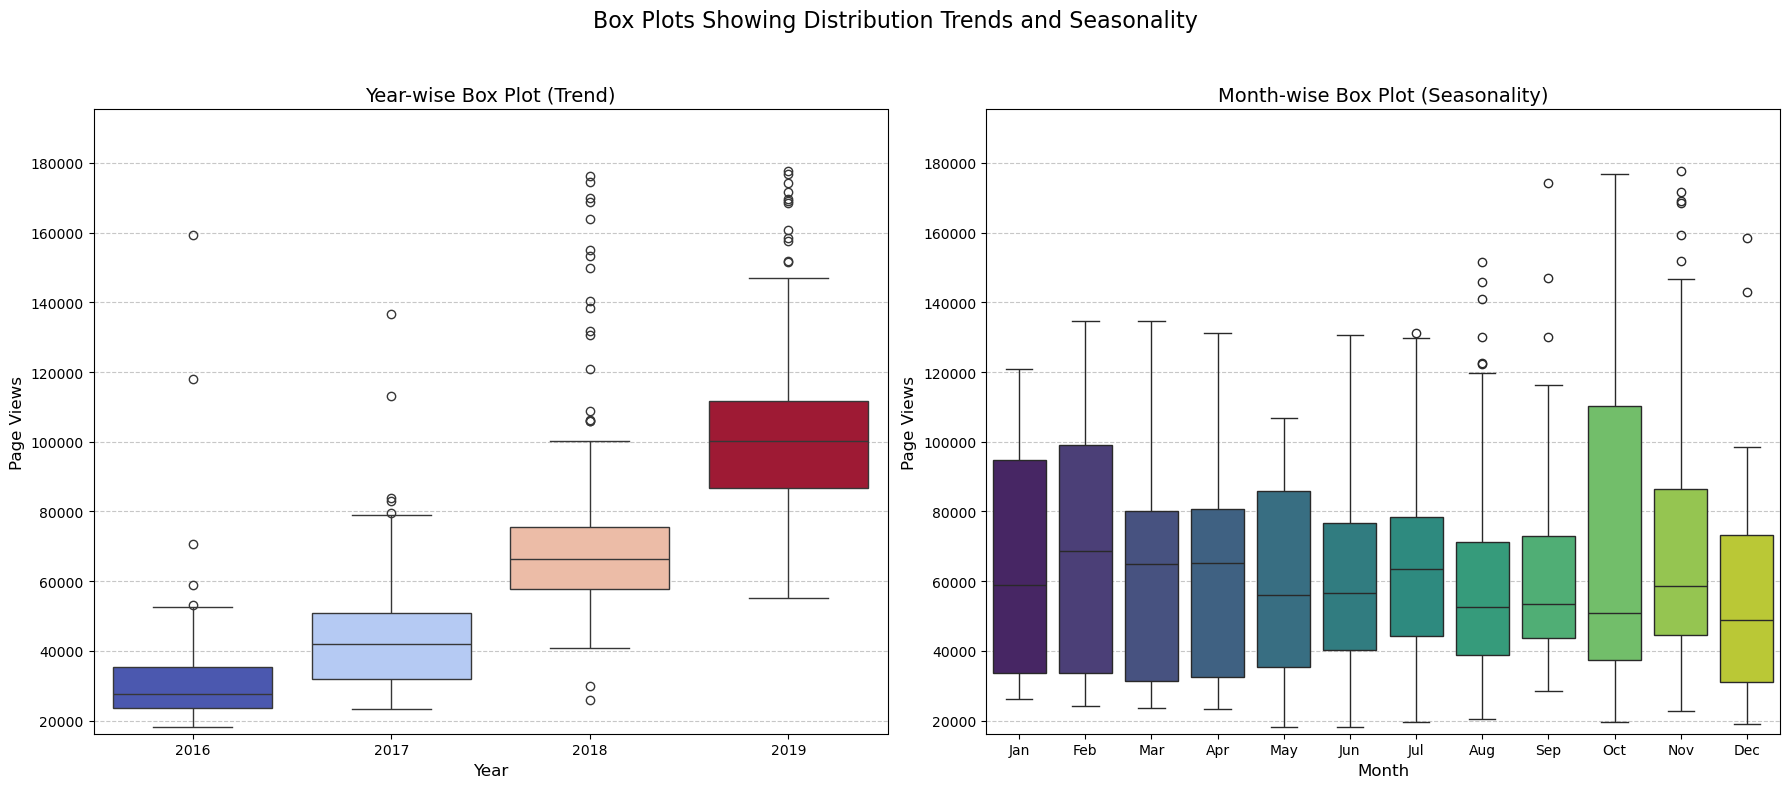

In [195]:
draw_box_plot(df)